# Kaggle Competition - Titanic 
The goal of this competition is to predict whether a passenger survives.  Two data sets are provided: Training and Test.  The training data will be used to train the model, and the prediction based on the test data set will be submitted for the competition

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Exploratory Data Analysis
There are 12 columns: 5 of them are categorical, and 7 of them numerical. The column 'Survived' will be used as target.  

Here are some of the preliminary observations:
- Age is missing in 177 entries in training data, and it is missing in 86 of the test data
- Embarked is missing 2 entries in training data
- Cabin is missing for some of the entries; we will check to see if it is populated for all first-class passengers
- Fare is missing for 1 entry in test data

In [7]:
train_df['train'] = 1
test_df['train'] = 0
combined_df = pd.concat([train_df, test_df], axis=0)
combined_df.index = range(combined_df.shape[0])
combined_df.shape

(1309, 13)

In [8]:
describe_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
print(combined_df[describe_cols].describe())
print('-' * 40)
print(train_df[describe_cols].describe())
print('-' * 40)
print(test_df[describe_cols].describe())

            Pclass          Age        SibSp        Parch         Fare
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000
mean      2.294882    29.881138     0.498854     0.385027    33.295479
std       0.837836    14.413493     1.041658     0.865560    51.758668
min       1.000000     0.170000     0.000000     0.000000     0.000000
25%       2.000000    21.000000     0.000000     0.000000     7.895800
50%       3.000000    28.000000     0.000000     0.000000    14.454200
75%       3.000000    39.000000     1.000000     0.000000    31.275000
max       3.000000    80.000000     8.000000     9.000000   512.329200
----------------------------------------
           Pclass         Age       SibSp       Parch        Fare
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   14.526497    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000   

The statistics are fairly similar between the training and test data, except for Parch.  Some general observations:
- There were more 3rd class passengers than 1st and 2nd classes combined
- The passengers were fairly young, with average around 30, and 75-percentile around 38/39
- Most passengers (>75%) had none or 1 siblings on-board
- Most passengers (>75%) had no children or parents on board and it is heavily right-skewed
- The avg fare was around 33, and most passengers (75%) paid around 31 or less
- Test data has max Parch value = 9, and training data has max Parch value = 6

In [9]:
print(combined_df.describe(include=['O']))
print('-' * 40)
print(train_df.describe(include=['O']))
print('-' * 40)
print(test_df.describe(include=['O']))

                        Name   Sex    Ticket        Cabin Embarked
count                   1309  1309      1309          295     1307
unique                  1307     2       929          186        3
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S
freq                       2   843        11            6      914
----------------------------------------
                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644
----------------------------------------
                    Name   Sex    Ticket            Cabin Embarked
count                418   418       418               91      418
unique               418     2       363               76        3
top     Kelly, Mr. James  male  PC 17608  B57 B59 B63 B66     

In [10]:
# There are 2 passengers with the same name
combined_df[combined_df['Name'] == 'Connolly, Miss. Kate']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q,1
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0


The passengers with the same name seemed to be different individuals and are not duplicated entries

In [11]:
combined_df.loc[combined_df['Pclass'] == 1, 'Cabin'].isnull().sum()

67

In [12]:
combined_df[(combined_df['Pclass'] == 1) & (combined_df['Cabin'].isnull())].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
30,31,0.0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1
34,35,0.0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,1
35,36,0.0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,1
64,65,0.0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,1
83,84,0.0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S,1
155,156,0.0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C,1
168,169,0.0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,1
187,188,1.0,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S,1
256,257,1.0,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C,1
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1


'Cabin' is not specified for all first class passengers, and a large amount of data is missing.  We will not be using cabin in our model

<Axes: xlabel='Sex', ylabel='Percent'>

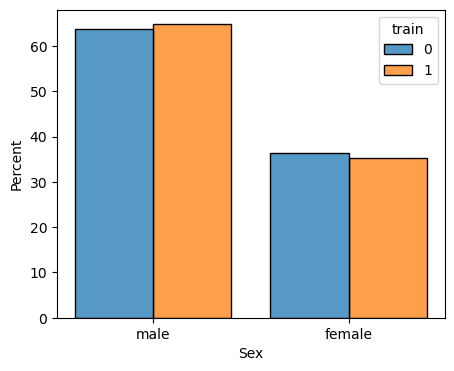

In [13]:
fig = plt.figure(figsize=(5,4))
df_plot = combined_df.copy()
sns.histplot(data=df_plot, x='Sex', hue='train', stat='percent', common_norm=False, multiple='dodge', shrink=0.8)

<Axes: xlabel='Embarked', ylabel='Percent'>

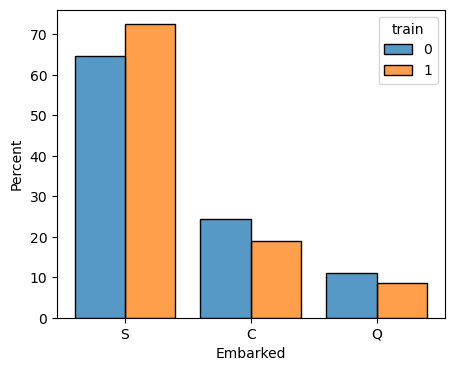

In [14]:
fig = plt.figure(figsize=(5,4))
df_plot = combined_df.copy()
sns.histplot(data=df_plot, x='Embarked', hue='train', stat='percent', common_norm=False, multiple='dodge', shrink=0.8)

The distribution of 'Sex' and 'Embarked' are relatively similar between train and test data sets. 60-70% of the passengers boarded at Southamton, about 20% boarded at Cherbourg, and 10% boarded at Queenstown

## Data correlation
Next we will check how correlated each feature is with 'Survived'.  We will first check the numerical features, followed by categorical features.  This will help us decide which features to use in our prediction model

<Axes: >

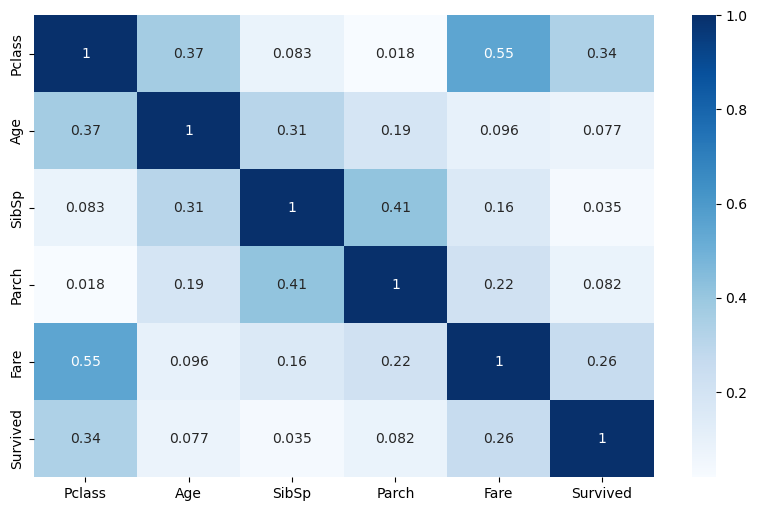

In [15]:
corr = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr()
figure = plt.figure(figsize=(10,6))
sns.heatmap(abs(corr), cmap='Blues', annot=True)

Pclass and Fare are highest correlated with Survived, and will be included in our model.  We will take a closer look at the other parameters

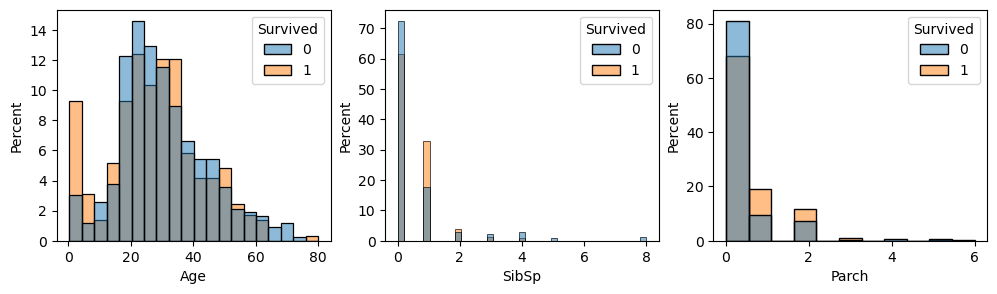

In [16]:
fig = plt.figure(figsize=(12,3))
#train_groupby_survive = train_df.groupby('Survived')
for indx, col in enumerate(['Age', 'SibSp', 'Parch']):
    fig.add_subplot(1,3,indx+1)
    sns.histplot(train_df, x=col, hue='Survived', stat='percent', common_norm=False)

It appears that the survival rate is higher for passengers that are younger (8 years or younger) or older (80 years or older), and is lower for passengers without siblings or parents/children onboard.  We can create new features based on these thresholds for the model

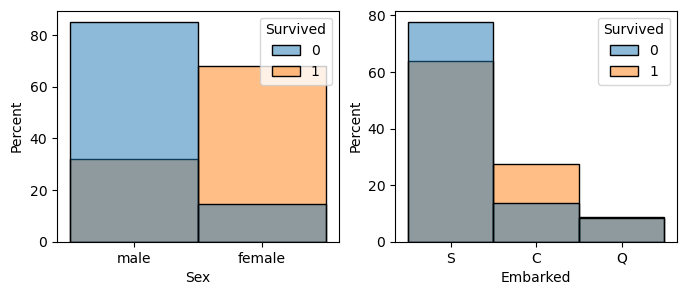

In [17]:
# Check correlation with cateogorical features
fig = plt.figure(figsize=(8,3))
for indx, col in enumerate(['Sex', 'Embarked']):
    fig.add_subplot(1,2,indx+1)
    sns.histplot(train_df, x=col, hue='Survived', stat='percent', common_norm=False)

Female passengers have higher survival rates.  Passengers boarded from Southampton has a lower survival rate, and those who boarded from Cherbourg has a higher survival rate.  We will include both these features in our model

## Data cleaning

The following cleaning action will be performed on training data as first steps:
- Change all column names to lower case
- Remove 'name' column since the values are unique and will not provide much information
- Remove 'ticket' since there are a lot of unique values
- Remove 'cabin' column
- Change 'sex' to numerical values
- Remove training entries with missing 'embarked' data as only 2 entries will be removed
- Populate missing values for 'age' column
- Add dummies for 'embarked'

Actions for cleaning training data:
- Populate missing value for 'fare'
- Populate missing values for 'age'

Finally, for both training and test sets, we will add new features for Age, SibSp and Parch

In [18]:
combined_clean = combined_df.copy()
# convert columns to lowercase
combined_clean.columns = combined_clean.columns.str.lower()

# remove columns 
combined_clean.drop(columns=['name', 'ticket', 'cabin'], inplace=True)

# remove rows with missing 'embarked' values
before_shape = combined_clean.shape
combined_clean = combined_clean[~combined_clean['embarked'].isnull()]
after_shape = combined_clean.shape
print('before shape: {}, after shape: {}'.format(before_shape, after_shape))

before shape: (1309, 10), after shape: (1307, 10)


In [19]:
combined_clean.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,train
0,1,0.0,3,male,22.0,1,0,7.2500,S,1
1,2,1.0,1,female,38.0,1,0,71.2833,C,1
2,3,1.0,3,female,26.0,0,0,7.9250,S,1
3,4,1.0,1,female,35.0,1,0,53.1000,S,1
4,5,0.0,3,male,35.0,0,0,8.0500,S,1


In [20]:
# convert sex to male
combined_clean['male'] = 0
combined_clean.loc[combined_clean['sex'] == 'male', 'male'] = 1
combined_clean.drop(columns=['sex'], inplace=True)

In [21]:
# For data with missing age value, we will impute it with the median for the given pclass and sex
unique_pclass = combined_clean['pclass'].unique()
unique_male = combined_clean['male'].unique()

for pclass in unique_pclass:
    for male in unique_male:
        age_median = combined_clean.loc[(combined_clean['pclass'] == pclass) & (combined_clean['male'] == male), 'age'].median()
        combined_clean.loc[(combined_clean['pclass'] == pclass) & (combined_clean['male'] == male), 'age'] = age_median

combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1307 non-null   int64  
 1   survived     889 non-null    float64
 2   pclass       1307 non-null   int64  
 3   age          1307 non-null   float64
 4   sibsp        1307 non-null   int64  
 5   parch        1307 non-null   int64  
 6   fare         1306 non-null   float64
 7   embarked     1307 non-null   object 
 8   train        1307 non-null   int64  
 9   male         1307 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


In [22]:
# look into entry with missing fare
combined_clean[combined_clean['fare'].isnull()]

,passengerid,survived,pclass,age,sibsp,parch,fare,embarked,train,male
1043,1044,NaN,3,25.0,0,0,NaN,S,0,1


In [23]:
# Populate with the median ticket price for pclass=3 and embarked='S'
fare_median = combined_clean.loc[(combined_clean['pclass'] == pclass) & (combined_clean['embarked'] == 'S'), 'fare'].median()
fare_median

15.375

In [24]:
combined_clean.loc[combined_clean['fare'].isnull(), 'fare'] = fare_median
combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1307 non-null   int64  
 1   survived     889 non-null    float64
 2   pclass       1307 non-null   int64  
 3   age          1307 non-null   float64
 4   sibsp        1307 non-null   int64  
 5   parch        1307 non-null   int64  
 6   fare         1307 non-null   float64
 7   embarked     1307 non-null   object 
 8   train        1307 non-null   int64  
 9   male         1307 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


In [25]:
# Now we add the new features for age, sibsp and parch
combined_clean['young'] = [1 if age <= 8 else 0 for age in combined_clean['age']]
combined_clean['alone'] = ((combined_clean['sibsp'] == 0) & (combined_clean['parch'] == 0)).astype(int)

In [26]:
combined_clean.head()

,passengerid,survived,pclass,age,sibsp,parch,fare,embarked,train,male,young,alone
0,1,0.0,3,25.0,1,0,7.2500,S,1,1,0,0
1,2,1.0,1,35.0,1,0,71.2833,C,1,0,0,0
2,3,1.0,3,22.0,0,0,7.9250,S,1,0,0,1
3,4,1.0,1,35.0,1,0,53.1000,S,1,0,0,0
4,5,0.0,3,25.0,0,0,8.0500,S,1,1,0,1


In [27]:
# Add dummy variables for embarked
combined_dummy = pd.get_dummies(data = combined_clean,
                                columns = ['embarked'],
                                drop_first = True, 
                                dtype=int)
combined_dummy.head()

,passengerid,survived,pclass,age,sibsp,parch,fare,train,male,young,alone,embarked_Q,embarked_S
0,1,0.0,3,25.0,1,0,7.2500,1,1,0,0,0,1
1,2,1.0,1,35.0,1,0,71.2833,1,0,0,0,0,0
2,3,1.0,3,22.0,0,0,7.9250,1,0,0,1,0,1
3,4,1.0,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,5,0.0,3,25.0,0,0,8.0500,1,1,0,1,0,1


## Model training and prediction
We will use random forest for training and prediction.  After some trial submissions, it showed that using 'age' instead of 'young' provides a better prediction.  For future models, 'young' is not used.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [29]:
sel_features = combined_dummy.columns.drop(['passengerid', 'survived', 'young', 'sibsp', 'parch', 'train'])
X_train = combined_dummy.loc[combined_dummy['train'] == 1, sel_features]
y_train = combined_dummy.loc[combined_dummy['train'] == 1, 'survived']
X_test = combined_dummy.loc[combined_dummy['train'] == 0, sel_features]

In [30]:
X_train.columns

Index(['pclass', 'age', 'fare', 'male', 'alone', 'embarked_Q', 'embarked_S'], dtype='object')

In [31]:
rf = RandomForestClassifier(n_estimators=50,
                            min_samples_split=5,
                            random_state=1)
rf.fit(X_train, y_train)
train_accuracy = rf.score(X_train, y_train)
print('training data accuracy = {:.2f}%'.format(train_accuracy * 100))

training data accuracy = 89.99%


In [32]:
y_pred = rf.predict(X_test)

In [33]:
submission = pd.DataFrame({'PassengerId': combined_dummy.loc[combined_dummy['train'] == 0, 'passengerid'],
                           'Survived': y_pred})
submission['Survived'] = submission['Survived'].astype(int)
submission.head()

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1


In [34]:
submission.to_csv('submission_5.csv', index=False)

### Parameter grid search
Next, we will do a grid search of the various parameters to get the optimal parameters for prediction

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
rf_grid = RandomForestClassifier(random_state=1)
grid_params = {'n_estimators': list(range(10, 210, 10)),
               'max_depth': list(range(3, 21))}
search_cv = GridSearchCV(rf_grid,
                         param_grid=grid_params,
                         scoring='accuracy')
search_cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200]},
             scoring='accuracy')

In [37]:
best_score = search_cv.best_score_
best_params = search_cv.best_params_
best_estimator = search_cv.best_estimator_

In [38]:
print('accuracy = {:.2f}%'.format(best_score * 100))
print('best_params = {}'.format(best_params))
print('best_estimator = {}'.format(best_estimator))

y_pred = best_estimator.predict(X_test)

accuracy = 81.44%
best_params = {'max_depth': 8, 'n_estimators': 70}
best_estimator = RandomForestClassifier(max_depth=8, n_estimators=70, random_state=1)


In [39]:
submission = pd.DataFrame({'PassengerId': combined_dummy.loc[combined_dummy['train'] == 0, 'passengerid'],
                           'Survived': y_pred})
submission['Survived'] = submission['Survived'].astype(int)
submission.head()

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1


In [40]:
submission.to_csv('submission_6.csv', index=False)

With the use of GridCV, the accuracy is 76.8%.

Further improvement can be performed by creating new features.  For example, others have tried using the title of the passenger (e.g. Mr., Mrs., etc.) and Cabin Class (first letter in cabin).  Another example is using a different model other than random forest.